## Part 3: Data visualization in Python 

The main package for data visualization is matplotlib. Within this package the module pyplot provides most of the plots you will need for visualizing your data. Several other visualization packages exist:
* seaborn - this is builds on matplotlib and provides some more complicated plots
* ggplot2 - this uses the same syntax as ggplot in R, so might be useful is you're more familiar with that language.
* plotly - interactive plotting (used if you make plots for websites)

Pandas also has matplotlib inbuilt, so you can directly plot from pandas as well. The syntax is often very similar to the syntax used when plotting from pyplot.

To start off we have to import matplotlib.pyplot. Often this is import as plt, which means that from now you can just use the abbreviation plt. 

In jupyter notebook we have to do some special setup for matplotlib. We use *magic functions* for this. The magic function always begins with a % and in this case 'matplotlib'. We've got the options:
* %matplotlib inline - create a static plot under the cell that we're executing
* %matplotlib notebook - create an interactive, meaning we can resize and zoom.

For now we'll use, but we can change that at any time if we like (you will just have to rerun cells after you called the new magic function). 

#### Line plots
Let's start with the easiest plot, a line plot. We are just going to plot using all the default settings.

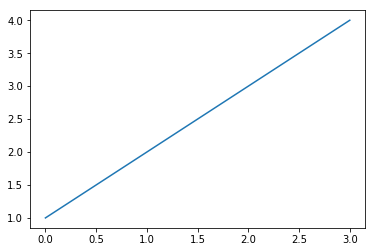

In [3]:
plt.plot([1,2,3,4])

A couple of things to note about this plot:
* The function automatically filled in the x points as [0,1,2,3]. In true Python fashion this starts at 0. If you want it to start at 1, you need to pass your own x-coordinates (plt.plot(x, y)). 
* The plot function will automatically draw a straight line between your points. 
* The plot won't have any axis labels, you have to add them separately if you want them.

Let's make this plot a bit nicer. We first want to add axes labels:

Text(0, 0.5, 'Size (cm)')

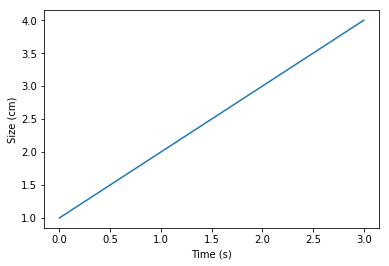

In [4]:
plt.plot([1,2,3,4])
plt.xlabel('Time (s)')
plt.ylabel('Size (cm)')

We can also change the axis dimensions:

(0, 10)

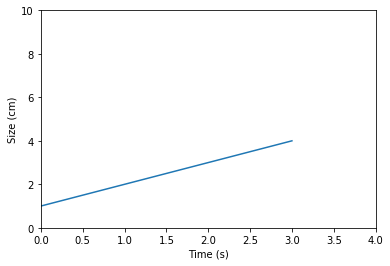

In [5]:
plt.plot([1,2,3,4])
plt.xlabel('Time (s)')
plt.ylabel('Size (cm)')
plt.xlim((0, 4))
plt.ylim((0, 10))

Lastly, we can change what the line itself looks like. It defaults to a blue line with no markers. However, we can tell it to just have markers, change the colour, change the width, make it dashed and many more options. You can use a shorthand, for example, 'go' will make it a green with o-shaped markers. 

Text(0, 0.5, 'Size (cm)')

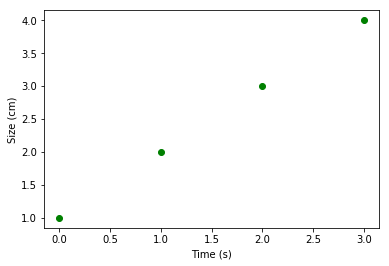

In [6]:
plt.plot([1,2,3,4], 'go')
plt.xlabel('Time (s)')
plt.ylabel('Size (cm)')


However, we can also tell it more explicitely what we want exactly, for example

Text(0, 0.5, 'Size (cm)')

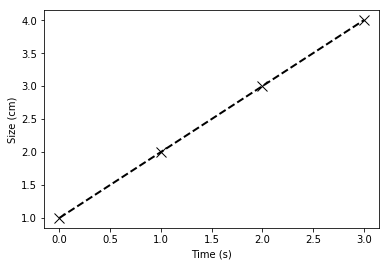

In [7]:
plt.plot([1,2,3,4], color='black', marker='x', linestyle='dashed',
...      linewidth=2, markersize=10)
plt.xlabel('Time (s)')
plt.ylabel('Size (cm)')


#### Saving a figure

You can easily save a figure by using the function savefig (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html). You can pass this function the dpi (dots per inch), which is the resolution of the image. 

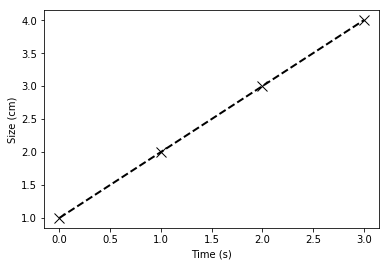

In [3]:
plt.plot([1,2,3,4], color='black', marker='x', linestyle='dashed',
...      linewidth=2, markersize=10)
plt.xlabel('Time (s)')
plt.ylabel('Size (cm)')

plt.savefig('example_plot.jpg', dpi=500)

### Multiple lineplots
You can also plot multiple datasets in one plot. This can be done in three different ways. If they are in separate lists or arrays, you can give each of them as inputs into your plot function.
You can also call plot for each of them. To indicate that you've want Python to plot what you have told it so far, you have to call plt.show(). 

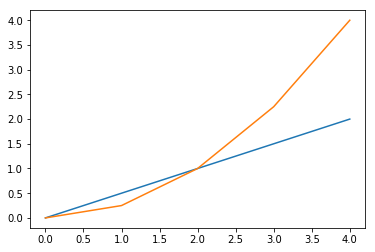

In [8]:
import numpy as np
t = np.arange(0,5,1)
data1 = np.arange(0,2.5,0.5)
data2 = data1**2
plt.plot(t,data1, t, data2)

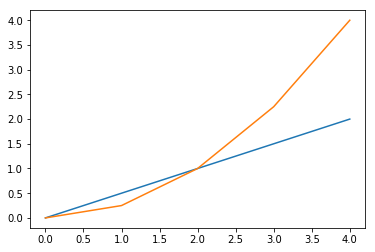

In [9]:
plt.plot(t, data1)
plt.plot(t, data2)
plt.show()

Using these two methods, you can also indicate the style of each line separately, by using what we discussed before for each separate line call.

If your data is all in 1 array, you can just plot them in one go. You might have to transpose your data if it does not plot the way you intended. You can do this on a numpy array by calling array.T. See if you can find out in the second example what dimension dictates the number of lines

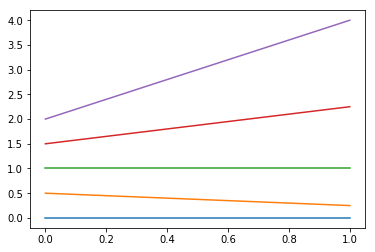

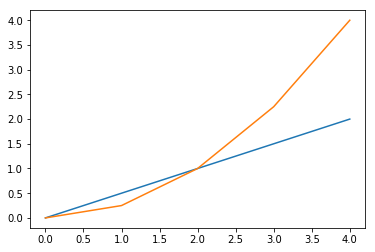

In [10]:
data_all = np.concatenate((np.expand_dims(data1,0), np.expand_dims(data2,0)))
plt.plot(data_all) # Wrong way around
plt.show()
plt.plot(t,data_all.T) # Fix it to plot the two lines we want

### Adding a legend
When we are plotting multiple lines, we want to add a legend of course. Agian this can be done in a coupel of different ways. You can add the labels in while you are plotting, or you can add them later. The two cells below do the same thing:

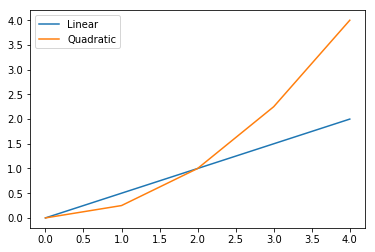

In [11]:
plt.plot(t, data1, label='Linear')
plt.plot(t, data2, label='Quadratic')
plt.legend()
plt.show()

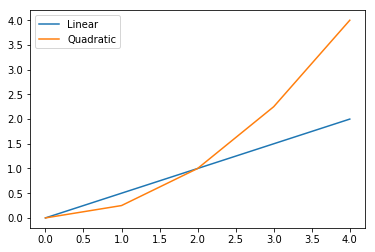

In [12]:
plt.plot(t,data_all.T) # Fix it to plot the two lines we want
plt.legend(['Linear', 'Quadratic'])
plt.show()

The legend function takes a number of arguments. Remember to use the help function to find out all of them. The most important one is probably position:

In [13]:
plt.legend?

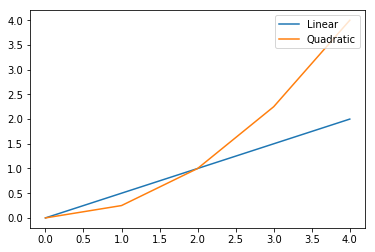

In [14]:
plt.plot(t,data_all.T) # Fix it to plot the two lines we want
plt.legend(['Linear', 'Quadratic'], loc='upper right')
plt.show()

### Subplots

Often you will want to make subplots, one figure that contains multiple plots. You can simply call subplot to do this:

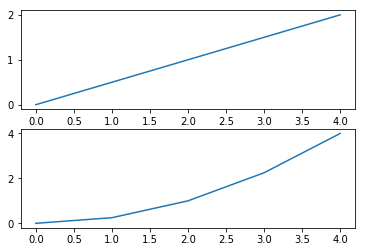

In [25]:
plt.subplot(2,1,1)
plt.plot(t, data1)
plt.subplot(2,1,2)
plt.plot(t, data2)


A more Pythonic way to do this is with the function 'subplots'. One annoying thing about this function is that it changes the functions you have to use to put in the xlabel, ylabel, title, etc. The reason you might want to do this though, is that it will allow you to very easily loop through all of your subplots.

The reason this happens is because a plot is wrapped up in two different objects, a figure and an axis. When you use the function plt.plot(), it will automatically create both a figure and an axis for you. The functions you use are executed on the figure.

However, when we want to create multiple subplots, we can't just use figure functions, because the figure will contain multiple axes, each containing a plot. Therefore you have to use the axis functions. 

This all sounds a lot more complicated than it actually is. Let's just start with an example:

If we want to label the x- and y-axes, rather than calling the xlabel or ylabel functions, we use 'set_xlabel' or 'set_ylabel'

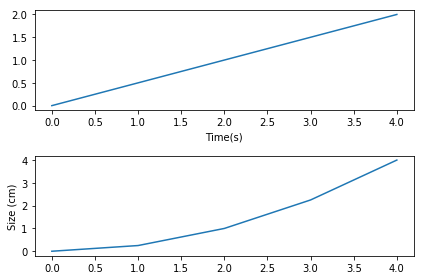

In [26]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(t, data1)
axes[0].set_xlabel('Time(s)')
axes[1].plot(t, data2)
axes[1].set_ylabel('Size (cm)')
plt.tight_layout()

Link axes

Saving out a figure

You can find the full overview of axes functions here: https://matplotlib.org/3.1.1/api/axes_api.html

### Other types of plots

Of course line plots are not the only types of plots that pyplot can handle. Some of the more common ones include:
* Image - imshow
* Histogram - hist
* Bar charts - bar
* Pie charts - pie
* Scatter plots - scatter
* Polar plots

See https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html for a complete overview

Below is an example of some of these plots

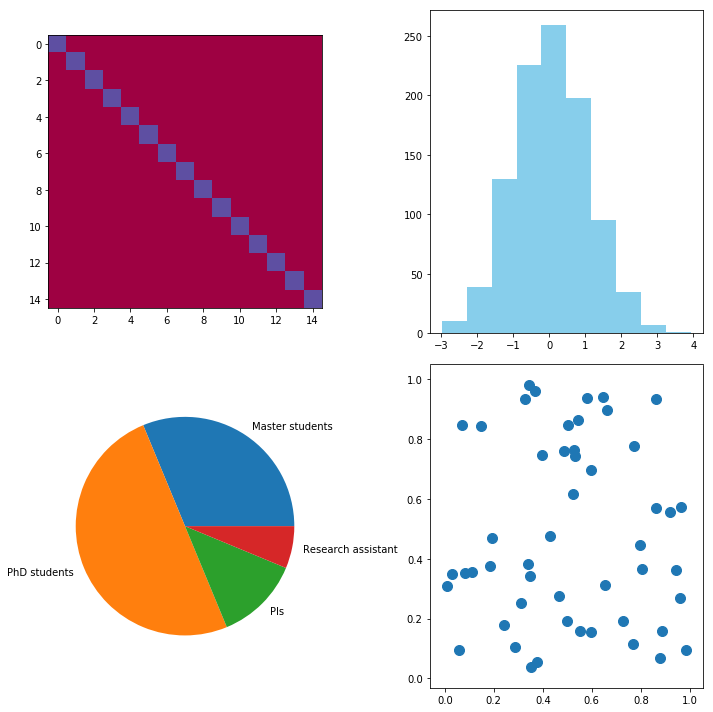

In [52]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))

image = np.eye(15)
axes[0,0].imshow(image, cmap='Spectral')

hist_data = np.random.normal(0,1,1000)
axes[0,1].hist(hist_data,color = "skyblue")

pie_data = [5, 8, 2, 1]
axes[1,0].pie(pie_data, labels=['Master students', 'PhD students', 'PIs', 'Research assistant'])

scatter_data = np.random.rand(2,50)
axes[1,1].scatter(scatter_data[0], scatter_data[1],s=100)

plt.tight_layout()

A couple of things to note in the plots above:
* We use the parameter 'figsize' in the subplots function. This parameter should be a tuple of length 2, where the first value is the width in inches, and the second is the height in inches. 
* Imshow takes a parameter called 'cmap', which is the colormap of the figure. The default is viridis, but you can change it to a number of preset colormaps (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html), or you can create your own.
* The histogram function takes the parameter color, which can either be a preset color, or you can put in your own rbg values. 
* The pie chart takes the 'label' parameter, which contains the label for each wedge of the pie chart.
* The scatter plot takes the parameter 's', which is the size of the marker in points**2. 